# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris
from utils.io import boreholes_from_files #, striplog_from_text, gdf_viewer, df_from_sources, striplog_from_df
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
df.drop('Z', axis='columns', inplace=True)
df.rename({'new_Z':'Z'}, axis='columns', inplace=True)

In [4]:
pol = ['As', 'Ni', 'Cl']
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [5]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne'})

In [6]:
df[:5]

,ID,X,Y,Z,Diameter,Length,Lithology,Colour,Thickness,Top_litho,Base_litho,Pollutant,Concentration,Unit
0,BH001,152600.0,121039.0,101.0,0.43,39,Sable,Jaune,4,0,4,Ni,51,mg/l
1,BH001,152600.0,121039.0,97.0,0.43,39,Argile,Vert,4,4,8,As,27,mg/l
2,BH001,152600.0,121039.0,93.0,0.43,39,Marne,Gris,12,8,20,Cl,56,mg/l
3,BH001,152600.0,121039.0,81.0,0.43,39,Charbon,Noir,8,20,28,Ni,48,mg/l
4,BH001,152600.0,121039.0,73.0,0.43,39,Calcaire,Bleu,11,28,39,Cl,59,mg/l


In [7]:
df.query('X==152013.0 and Y==121905.0')

,ID,X,Y,Z,Diameter,Length,Lithology,Colour,Thickness,Top_litho,Base_litho,Pollutant,Concentration,Unit
850,BH171,152013.0,121905.0,101.0,0.56,17,Sable,Jaune,2,0,2,Cl,67,mg/l
851,BH171,152013.0,121905.0,99.0,0.56,17,Argile,Vert,3,2,5,Cl,40,mg/l
852,BH171,152013.0,121905.0,96.0,0.56,17,Marne,Gris,6,5,11,Ni,63,mg/l
853,BH171,152013.0,121905.0,90.0,0.56,17,Charbon,Noir,3,11,14,Ni,63,mg/l
854,BH171,152013.0,121905.0,87.0,0.56,17,Calcaire,Bleu,3,14,17,As,77,mg/l


## Create Boreholes from dataframes or files

In [8]:
bhs_df=[df] # list of dataframes

In [9]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=True,
                                                litho_field='Lithology', color_field='Colour',
                                                lexicon=lexicon_memoris, diam_field='Diameter', 
                                                thick_field='Thickness')


Dataframe 0 processing...
|__ID:'BH001'
Summary : [Striplog(5 Intervals, start=0.0, stop=39.0)]
color: gris
color: bleu
color: noir
color: vert
color: jaune
{0: {'description': 'Sable Jaune', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f1ee53fa6d0>, 'base': <core.orm.PositionOrm object at 0x7f1ee53fa700>}, 1: {'description': 'Argile Vert', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f1ee53fa730>, 'base': <core.orm.PositionOrm object at 0x7f1ee53fa7f0>}, 2: {'description': 'Marne Gris', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f1ee53fa7c0>, 'base': <core.orm.PositionOrm object at 0x7f1ee53fa8b0>}, 3: {'description': 'Charbon Noir', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f1ee53fa8e0>, 'base': <core.orm.PositionOrm object at 0x7f1ee53fa910>}, 4: {'description': 'Calcaire Bleu', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f1ee53fa940>, 'base': <core.orm.PositionOrm object at 0x7f1ee

/home/yanathan/Projects/GSDMA/utils/io.py:474: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:474: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to


Summary : [Striplog(5 Intervals, start=0.0, stop=17.0)]
color: gris
color: bleu
color: vert
color: noir
color: jaune
{125: {'description': 'Sable Jaune', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f1ee5334730>, 'base': <core.orm.PositionOrm object at 0x7f1ee5334e20>}, 126: {'description': 'Argile Vert', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f1ee5334d60>, 'base': <core.orm.PositionOrm object at 0x7f1ee5302fd0>}, 127: {'description': 'Marne Gris', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f1ee5302880>, 'base': <core.orm.PositionOrm object at 0x7f1ee53203a0>}, 128: {'description': 'Charbon Noir', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f1ee537ab20>, 'base': <core.orm.PositionOrm object at 0x7f1ee537ad60>}, 129: {'description': 'Calcaire Bleu', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f1ee536b280>, 'base': <core.orm.PositionOrm object at 0x7f1ee5328cd0>}}

|__ID:'BH027'
Summ

color: vert
color: gris
{285: {'description': 'Sable Jaune', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f1ee5215c10>, 'base': <core.orm.PositionOrm object at 0x7f1ee5215fd0>}, 286: {'description': 'Argile Vert', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f1ee5215f40>, 'base': <core.orm.PositionOrm object at 0x7f1ee5215eb0>}, 287: {'description': 'Marne Gris', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f1ee5215730>, 'base': <core.orm.PositionOrm object at 0x7f1ee52153d0>}, 288: {'description': 'Charbon Noir', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f1ee5215580>, 'base': <core.orm.PositionOrm object at 0x7f1ee52158e0>}, 289: {'description': 'Calcaire Bleu', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f1ee52155e0>, 'base': <core.orm.PositionOrm object at 0x7f1ee52157f0>}}

|__ID:'BH059'
Summary : [Striplog(5 Intervals, start=0.0, stop=43.0)]
color: bleu
color: gris
color: noir
color:

|__ID:'BH092'
Summary : [Striplog(5 Intervals, start=0.0, stop=14.0)]
color: noir
color: jaune
color: bleu
color: gris
color: vert
{455: {'description': 'Sable Jaune', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f1ee50fc520>, 'base': <core.orm.PositionOrm object at 0x7f1ee50fc490>}, 456: {'description': 'Argile Vert', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f1ee50fc400>, 'base': <core.orm.PositionOrm object at 0x7f1ee517a760>}, 457: {'description': 'Marne Gris', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f1ee5165790>, 'base': <core.orm.PositionOrm object at 0x7f1ee5165070>}, 458: {'description': 'Charbon Noir', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f1ee5165ca0>, 'base': <core.orm.PositionOrm object at 0x7f1ee51658e0>}, 459: {'description': 'Calcaire Bleu', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f1ee516e6a0>, 'base': <core.orm.PositionOrm object at 0x7f1ee5165b80>}}

|__ID

color: bleu
color: gris
color: vert
color: jaune
color: noir
{610: {'description': 'Sable Jaune', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f1ee50532b0>, 'base': <core.orm.PositionOrm object at 0x7f1ee5053850>}, 611: {'description': 'Argile Vert', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f1ee50537f0>, 'base': <core.orm.PositionOrm object at 0x7f1ee5053790>}, 612: {'description': 'Marne Gris', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f1ee50531f0>, 'base': <core.orm.PositionOrm object at 0x7f1ee50533a0>}, 613: {'description': 'Charbon Noir', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f1ee50530a0>, 'base': <core.orm.PositionOrm object at 0x7f1ee5053220>}, 614: {'description': 'Calcaire Bleu', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f1ee5053340>, 'base': <core.orm.PositionOrm object at 0x7f1ee50534c0>}}

|__ID:'BH124'
Summary : [Striplog(5 Intervals, start=0.0, stop=33.0)]
color

color: noir
color: bleu
color: jaune
color: vert
{715: {'description': 'Sable Jaune', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f1ee5366370>, 'base': <core.orm.PositionOrm object at 0x7f1ee5241190>}, 716: {'description': 'Argile Vert', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f1ee5241580>, 'base': <core.orm.PositionOrm object at 0x7f1ee52410d0>}, 717: {'description': 'Marne Gris', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f1ee5241820>, 'base': <core.orm.PositionOrm object at 0x7f1ee5241370>}, 718: {'description': 'Charbon Noir', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f1ee52415e0>, 'base': <core.orm.PositionOrm object at 0x7f1ee5241400>}, 719: {'description': 'Calcaire Bleu', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f1ee5241760>, 'base': <core.orm.PositionOrm object at 0x7f1ee52b3220>}}

|__ID:'BH145'
Summary : [Striplog(5 Intervals, start=0.0, stop=28.0)]
color: gris
color

color: vert
color: noir
color: gris
color: jaune
{875: {'description': 'Sable Jaune', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f1ee500fc40>, 'base': <core.orm.PositionOrm object at 0x7f1ee2f0d9d0>}, 876: {'description': 'Argile Vert', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f1ee2f0dd90>, 'base': <core.orm.PositionOrm object at 0x7f1ee2f0dd00>}, 877: {'description': 'Marne Gris', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f1ee2f0dc40>, 'base': <core.orm.PositionOrm object at 0x7f1ee2f0d4f0>}, 878: {'description': 'Charbon Noir', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f1ee2f0d4c0>, 'base': <core.orm.PositionOrm object at 0x7f1ee2f0d3a0>}, 879: {'description': 'Calcaire Bleu', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f1ee2f0d370>, 'base': <core.orm.PositionOrm object at 0x7f1ee2f0d610>}}

|__ID:'BH177'
Summary : [Striplog(5 Intervals, start=0.0, stop=35.0)]
color: bleu
color

In [10]:
boreholes[170].intervals[850].top.x, boreholes[170].intervals[850].top.y

(152013.0, 121905.0)

In [11]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=39, Diameter=0.43, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=29, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=41, Diameter=0.57, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=31, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH011, Length=30, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH012, Length=41, Diameter=0.54, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH013, Length=29, Diameter=0.36, Intervals=5),
 <core.orm.Bore

In [12]:
components

{0: Component({'lithology': 'marne', 'colour': 'gris'}),
 1: Component({'lithology': 'calcaire', 'colour': 'bleu'}),
 2: Component({'lithology': 'charbon', 'colour': 'noir'}),
 3: Component({'lithology': 'argile', 'colour': 'vert'}),
 4: Component({'lithology': 'sable', 'colour': 'jaune'})}

In [13]:
len(boreholes), len(components)

(199, 5)

## Create a project and save data in a database

In [14]:
remove('tmp_files/tfe_orm_db.db')

In [15]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [16]:
Base.metadata.create_all(engine)

2021-06-25 12:36:48,110 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:48,111 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-06-25 12:36:48,112 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-25 12:36:48,113 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-06-25 12:36:48,114 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-25 12:36:48,115 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-06-25 12:36:48,116 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-25 12:36:48,117 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-06-25 12:36:48,117 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-25 12:36:48,119 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-06-25 12:36:48,119 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-25 12:36:48,120 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-06-25 12:36:48,121 INFO sqlalchemy.engine.Engine 

In [17]:
Session = sessionmaker(bind=engine)
session = Session()

In [18]:
p = Project(session, legend_dict={'lithology':lithology_memoris}, lexicon=lexicon_memoris, 
            repr_attribute='lithology')
p.add_components(components)

2021-06-25 12:36:48,168 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:48,171 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:48,172 INFO sqlalchemy.engine.Engine [generated in 0.00094s] ()
2021-06-25 12:36:48,175 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-06-25 12:36:48,176 INFO sqlalchemy.engine.Engine [generated in 0.00101s] ((0, 'Marne, gris'), (1, 'Calcaire, bleu'), (2, 'Charbon, noir'), (3, 'Argile, vert'), (4, 'Sable, jaune'))
2021-06-25 12:36:48,177 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:48,180 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:48,181 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:48

Add boreholes into the project

In [19]:
for bh in boreholes:
    p.add_borehole(bh)

2021-06-25 12:36:48,189 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:48,190 INFO sqlalchemy.engine.Engine [generated in 0.00085s] ('BH001', 39.0, 0.43)
2021-06-25 12:36:48,192 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:48,192 INFO sqlalchemy.engine.Engine [generated in 0.00072s] ((0, 0.0, 0.0, 0.0, 152600.0, 121039.0), (1, 4.0, 4.0, 4.0, 152600.0, 121039.0), (2, 4.0, 4.0, 4.0, 152600.0, 121039.0), (3, 8.0, 8.0, 8.0, 152600.0, 121039.0), (4, 8.0, 8.0, 8.0, 152600.0, 121039.0), (5, 20.0, 20.0, 20.0, 152600.0, 121039.0), (6, 20.0, 20.0, 20.0, 152600.0, 121039.0), (7, 28.0, 28.0, 28.0, 152600.0, 121039.0), (8, 28.0, 28.0, 28.0, 152600.0, 121039.0), (9, 39.0, 39.0, 39.0, 152600.0, 121039.0))
2021-06-25 12:36:48,195 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, 

2021-06-25 12:36:48,275 INFO sqlalchemy.engine.Engine [cached since 0.06607s ago] ('BH002',)
2021-06-25 12:36:48,278 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,278 INFO sqlalchemy.engine.Engine [cached since 0.06179s ago] (10,)
2021-06-25 12:36:48,280 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,281 INFO sqlalchemy.engine.Engine [cached since 0.05965s ago] (11,)
2021-06-25 12:36:48,283 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Pos

2021-06-25 12:36:48,347 INFO sqlalchemy.engine.Engine [cached since 0.1306s ago] (24,)
2021-06-25 12:36:48,349 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,350 INFO sqlalchemy.engine.Engine [cached since 0.1285s ago] (25,)
2021-06-25 12:36:48,352 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,353 INFO sqlalchemy.engine.Engine [cached since 0.1366s ago] (26,)
2021-06-25 12:36:48,355 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:48,415 INFO sqlalchemy.engine.Engine [cached since 0.1937s ago] (39,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:48,428 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:48,428 INFO sqlalchemy.engine.Engine [cached since 0.239s ago] ('BH005', 29.0, 0.61)
2021-06-25 12:36:48,430 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:48,431 INFO sqlalchemy.engine.Engine [cached since 0.239s ago] ((40, 0.0, 0.0, 0.0, 152473.0, 121460.0), (41, 4.0, 4.0, 4.0, 152473.0, 121460.0), (42, 4.0, 4.0, 4.0, 152473.0, 121460.0), (43, 8.0, 8.0, 8.0, 152473.0, 121460.0), (44, 8.0, 8.0, 8.0, 152473.0, 121460.0), (45, 19.0, 19.0, 19.0, 152473.0, 121460.0), (46, 19.0, 19.0, 19.0, 152473.0, 121460.0), (47, 27.0, 27.0, 27.0, 152473.0, 121460.0), (48, 27.0, 27.0, 27.0, 152473.0, 121460.0), (49, 29.0, 2

2021-06-25 12:36:48,493 INFO sqlalchemy.engine.Engine [cached since 0.3221s ago] ()
2021-06-25 12:36:48,495 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:48,496 INFO sqlalchemy.engine.Engine [cached since 0.2868s ago] ('BH006',)
2021-06-25 12:36:48,498 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,499 INFO sqlalchemy.engine.Engine [cached since 0.282s ago] (50,)
2021-06-25 12:36:48,500 IN

2021-06-25 12:36:48,558 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,559 INFO sqlalchemy.engine.Engine [cached since 0.3376s ago] (63,)
2021-06-25 12:36:48,563 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,563 INFO sqlalchemy.engine.Engine [cached since 0.3466s ago] (64,)
2021-06-25 12:36:48,565 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-25 12:36:48,618 INFO sqlalchemy.engine.Engine [cached since 0.3966s ago] (77,)
2021-06-25 12:36:48,619 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,619 INFO sqlalchemy.engine.Engine [cached since 0.4029s ago] (78,)
2021-06-25 12:36:48,620 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,621 INFO sqlalchemy.engine.Engine [cached since 0.3997s ago] (79,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-2

2021-06-25 12:36:48,683 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:48,684 INFO sqlalchemy.engine.Engine [cached since 0.489s ago] ((45, 'BH10', 0, 'Sable Jaune', 90, 91), (46, 'BH10', 1, 'Argile Vert', 92, 93), (47, 'BH10', 2, 'Marne Gris', 94, 95), (48, 'BH10', 3, 'Charbon Noir', 96, 97), (49, 'BH10', 4, 'Calcaire Bleu', 98, 99))
2021-06-25 12:36:48,685 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:48,688 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:48,689 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:48,689 INFO sqlalchemy.engine.Engine [cached since 0.5181s ago] ()
2021-06-25 12:36:48,691 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_boreh

2021-06-25 12:36:48,756 INFO sqlalchemy.engine.Engine [cached since 0.5347s ago] (101,)
2021-06-25 12:36:48,758 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,759 INFO sqlalchemy.engine.Engine [cached since 0.542s ago] (102,)
2021-06-25 12:36:48,760 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,760 INFO sqlalchemy.engine.Engine [cached since 0.5391s ago] (103,)
2021-06-25 12:36:48,762 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions

2021-06-25 12:36:48,814 INFO sqlalchemy.engine.Engine [cached since 0.5975s ago] (116,)
2021-06-25 12:36:48,816 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,818 INFO sqlalchemy.engine.Engine [cached since 0.5963s ago] (117,)
2021-06-25 12:36:48,821 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,822 INFO sqlalchemy.engine.Engine [cached since 0.6052s ago] (118,)
2021-06-25 12:36:48,824 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-25 12:36:48,893 INFO sqlalchemy.engine.Engine [cached since 0.7018s ago] ((130, 0.0, 0.0, 0.0, 152647.0, 121169.0), (131, 6.0, 6.0, 6.0, 152647.0, 121169.0), (132, 6.0, 6.0, 6.0, 152647.0, 121169.0), (133, 9.0, 9.0, 9.0, 152647.0, 121169.0), (134, 9.0, 9.0, 9.0, 152647.0, 121169.0), (135, 15.0, 15.0, 15.0, 152647.0, 121169.0), (136, 15.0, 15.0, 15.0, 152647.0, 121169.0), (137, 24.0, 24.0, 24.0, 152647.0, 121169.0), (138, 24.0, 24.0, 24.0, 152647.0, 121169.0), (139, 26.0, 26.0, 26.0, 152647.0, 121169.0))
2021-06-25 12:36:48,895 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:48,895 INFO sqlalchemy.engine.Engine [cached since 0.7006s ago] ((65, 'BH014', 0, 'Sable Jaune', 130, 131), (66, 'BH014', 1, 'Argile Vert', 132, 133), (67, 'BH014', 2, 'Marne Gris', 134, 135), (68, 'BH014', 3, 'Charbon Noir', 136, 137), (69, 'BH014', 4, 'Calcaire Bleu', 138, 139))
2021-06-25 12:36:4

2021-06-25 12:36:48,965 INFO sqlalchemy.engine.Engine [cached since 0.7553s ago] ('BH015',)
2021-06-25 12:36:48,966 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,968 INFO sqlalchemy.engine.Engine [cached since 0.7512s ago] (140,)
2021-06-25 12:36:48,970 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:48,971 INFO sqlalchemy.engine.Engine [cached since 0.7496s ago] (141,)
2021-06-25 12:36:48,974 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posi

2021-06-25 12:36:49,031 INFO sqlalchemy.engine.Engine [cached since 0.8143s ago] (154,)
2021-06-25 12:36:49,032 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,033 INFO sqlalchemy.engine.Engine [cached since 0.8115s ago] (155,)
2021-06-25 12:36:49,035 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,036 INFO sqlalchemy.engine.Engine [cached since 0.8193s ago] (156,)
2021-06-25 12:36:49,037 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-25 12:36:49,104 INFO sqlalchemy.engine.Engine [cached since 0.8822s ago] (169,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:49,117 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:49,118 INFO sqlalchemy.engine.Engine [cached since 0.9288s ago] ('BH018', 34.0, 0.59)
2021-06-25 12:36:49,120 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:49,121 INFO sqlalchemy.engine.Engine [cached since 0.9295s ago] ((170, 0.0, 0.0, 0.0, 152134.0, 121576.0), (171, 4.0, 4.0, 4.0, 152134.0, 121576.0), (172, 4.0, 4.0, 4.0, 152134.0, 121576.0), (173, 7.0, 7.0, 7.0, 152134.0, 121576.0), (174, 7.0, 7.0, 7.0, 152134.0, 121576.0), (175, 12.0, 12.0, 12.0, 152134.0, 121576.0), (176, 12.0, 12.0, 12.0, 152134.0, 121576.0), (177, 19.0, 19.0, 19.0, 152134.0, 121576.0), (178, 19.0, 19.0, 19.0, 152134.0, 121576.0), 

2021-06-25 12:36:49,180 INFO sqlalchemy.engine.Engine [cached since 1.009s ago] ()
2021-06-25 12:36:49,182 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:49,184 INFO sqlalchemy.engine.Engine [cached since 0.9742s ago] ('BH019',)
2021-06-25 12:36:49,187 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,188 INFO sqlalchemy.engine.Engine [cached since 0.9713s ago] (180,)
2021-06-25 12:36:49,189 I

2021-06-25 12:36:49,247 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,248 INFO sqlalchemy.engine.Engine [cached since 1.027s ago] (193,)
2021-06-25 12:36:49,250 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,251 INFO sqlalchemy.engine.Engine [cached since 1.034s ago] (194,)
2021-06-25 12:36:49,253 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-25 12:36:49,311 INFO sqlalchemy.engine.Engine [cached since 1.09s ago] (207,)
2021-06-25 12:36:49,313 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,314 INFO sqlalchemy.engine.Engine [cached since 1.097s ago] (208,)
2021-06-25 12:36:49,315 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,316 INFO sqlalchemy.engine.Engine [cached since 1.094s ago] (209,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25

2021-06-25 12:36:49,383 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:49,384 INFO sqlalchemy.engine.Engine [cached since 1.19s ago] ((110, 'BH023', 0, 'Sable Jaune', 220, 221), (111, 'BH023', 1, 'Argile Vert', 222, 223), (112, 'BH023', 2, 'Marne Gris', 224, 225), (113, 'BH023', 3, 'Charbon Noir', 226, 227), (114, 'BH023', 4, 'Calcaire Bleu', 228, 229))
2021-06-25 12:36:49,387 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:49,391 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:49,392 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:49,393 INFO sqlalchemy.engine.Engine [cached since 1.222s ago] ()
2021-06-25 12:36:49,395 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole A

2021-06-25 12:36:49,459 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,460 INFO sqlalchemy.engine.Engine [cached since 1.238s ago] (231,)
2021-06-25 12:36:49,462 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,462 INFO sqlalchemy.engine.Engine [cached since 1.246s ago] (232,)
2021-06-25 12:36:49,464 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-25 12:36:49,527 INFO sqlalchemy.engine.Engine [cached since 1.305s ago] (245,)
2021-06-25 12:36:49,528 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,529 INFO sqlalchemy.engine.Engine [cached since 1.313s ago] (246,)
2021-06-25 12:36:49,531 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,532 INFO sqlalchemy.engine.Engine [cached since 1.31s ago] (247,)
2021-06-25 12:36:49,533 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

Borehole geometry created successfully !
2021-06-25 12:36:49,603 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:49,604 INFO sqlalchemy.engine.Engine [cached since 1.415s ago] ('BH027', 25.0, 0.39)
2021-06-25 12:36:49,606 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:49,607 INFO sqlalchemy.engine.Engine [cached since 1.415s ago] ((260, 0.0, 0.0, 0.0, 152334.0, 121422.0), (261, 1.0, 1.0, 1.0, 152334.0, 121422.0), (262, 1.0, 1.0, 1.0, 152334.0, 121422.0), (263, 4.0, 4.0, 4.0, 152334.0, 121422.0), (264, 4.0, 4.0, 4.0, 152334.0, 121422.0), (265, 10.0, 10.0, 10.0, 152334.0, 121422.0), (266, 10.0, 10.0, 10.0, 152334.0, 121422.0), (267, 13.0, 13.0, 13.0, 152334.0, 121422.0), (268, 13.0, 13.0, 13.0, 152334.0, 121422.0), (269, 25.0, 25.0, 25.0, 152334.0, 121422.0))
2021-06-25 12:36:49,609 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, bor

2021-06-25 12:36:49,665 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:49,666 INFO sqlalchemy.engine.Engine [cached since 1.457s ago] ('BH028',)
2021-06-25 12:36:49,669 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,670 INFO sqlalchemy.engine.Engine [cached since 1.454s ago] (270,)
2021-06-25 12:36:49,673 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upp

2021-06-25 12:36:49,729 INFO sqlalchemy.engine.Engine [cached since 1.507s ago] (283,)
2021-06-25 12:36:49,730 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,731 INFO sqlalchemy.engine.Engine [cached since 1.514s ago] (284,)
2021-06-25 12:36:49,732 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,733 INFO sqlalchemy.engine.Engine [cached since 1.512s ago] (285,)
2021-06-25 12:36:49,734 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:49,795 INFO sqlalchemy.engine.Engine [cached since 1.578s ago] (298,)
2021-06-25 12:36:49,796 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,797 INFO sqlalchemy.engine.Engine [cached since 1.575s ago] (299,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:49,805 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:49,805 INFO sqlalchemy.engine.Engine [cached since 1.616s ago] ('BH031', 22.0, 0.41)
2021-06-25 12:36:49,807 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:49,807 INFO sqlalchemy.engine.Engine [cached s

2021-06-25 12:36:49,873 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:49,877 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:49,879 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:49,880 INFO sqlalchemy.engine.Engine [cached since 1.709s ago] ()
2021-06-25 12:36:49,883 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:49,883 INFO sqlalchemy.engine.Engine [cached since 1.674s ago] ('BH032',)
2021-06-25 12:36:49,886 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions"

2021-06-25 12:36:49,932 INFO sqlalchemy.engine.Engine [cached since 1.715s ago] (322,)
2021-06-25 12:36:49,933 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,934 INFO sqlalchemy.engine.Engine [cached since 1.713s ago] (323,)
2021-06-25 12:36:49,936 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,937 INFO sqlalchemy.engine.Engine [cached since 1.72s ago] (324,)
2021-06-25 12:36:49,939 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-06-25 12:36:49,996 INFO sqlalchemy.engine.Engine [cached since 1.775s ago] (337,)
2021-06-25 12:36:49,997 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:49,998 INFO sqlalchemy.engine.Engine [cached since 1.781s ago] (338,)
2021-06-25 12:36:50,000 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,000 INFO sqlalchemy.engine.Engine [cached since 1.779s ago] (339,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-2

2021-06-25 12:36:50,071 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:50,071 INFO sqlalchemy.engine.Engine [cached since 1.876s ago] ((175, 'BH036', 0, 'Sable Jaune', 350, 351), (176, 'BH036', 1, 'Argile Vert', 352, 353), (177, 'BH036', 2, 'Marne Gris', 354, 355), (178, 'BH036', 3, 'Charbon Noir', 356, 357), (179, 'BH036', 4, 'Calcaire Bleu', 358, 359))
2021-06-25 12:36:50,072 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:50,076 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:50,077 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:50,078 INFO sqlalchemy.engine.Engine [cached since 1.907s ago] ()
2021-06-25 12:36:50,080 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole 

2021-06-25 12:36:50,147 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,147 INFO sqlalchemy.engine.Engine [cached since 1.926s ago] (361,)
2021-06-25 12:36:50,149 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,149 INFO sqlalchemy.engine.Engine [cached since 1.933s ago] (362,)
2021-06-25 12:36:50,151 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-25 12:36:50,215 INFO sqlalchemy.engine.Engine [cached since 1.993s ago] (375,)
2021-06-25 12:36:50,216 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,217 INFO sqlalchemy.engine.Engine [cached since 2s ago] (376,)
2021-06-25 12:36:50,219 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,219 INFO sqlalchemy.engine.Engine [cached since 1.998s ago] (377,)
2021-06-25 12:36:50,221 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", 

2021-06-25 12:36:50,283 INFO sqlalchemy.engine.Engine [cached since 2.094s ago] ('BH040', 27.0, 0.59)
2021-06-25 12:36:50,285 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:50,285 INFO sqlalchemy.engine.Engine [cached since 2.094s ago] ((390, 0.0, 0.0, 0.0, 152000.0, 121658.0), (391, 1.0, 1.0, 1.0, 152000.0, 121658.0), (392, 1.0, 1.0, 1.0, 152000.0, 121658.0), (393, 5.0, 5.0, 5.0, 152000.0, 121658.0), (394, 5.0, 5.0, 5.0, 152000.0, 121658.0), (395, 12.0, 12.0, 12.0, 152000.0, 121658.0), (396, 12.0, 12.0, 12.0, 152000.0, 121658.0), (397, 14.0, 14.0, 14.0, 152000.0, 121658.0), (398, 14.0, 14.0, 14.0, 152000.0, 121658.0), (399, 27.0, 27.0, 27.0, 152000.0, 121658.0))
2021-06-25 12:36:50,287 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:50,288 INFO sqlalchemy.engine.Engine [cached since 2.093s ago]

2021-06-25 12:36:50,353 INFO sqlalchemy.engine.Engine [cached since 2.144s ago] ('BH041',)
2021-06-25 12:36:50,355 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,355 INFO sqlalchemy.engine.Engine [cached since 2.139s ago] (400,)
2021-06-25 12:36:50,358 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,359 INFO sqlalchemy.engine.Engine [cached since 2.137s ago] (401,)
2021-06-25 12:36:50,361 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-25 12:36:50,416 INFO sqlalchemy.engine.Engine [cached since 2.2s ago] (414,)
2021-06-25 12:36:50,417 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,418 INFO sqlalchemy.engine.Engine [cached since 2.197s ago] (415,)
2021-06-25 12:36:50,421 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,422 INFO sqlalchemy.engine.Engine [cached since 2.206s ago] (416,)
2021-06-25 12:36:50,424 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id"

2021-06-25 12:36:50,486 INFO sqlalchemy.engine.Engine [cached since 2.265s ago] (429,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:50,496 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:50,497 INFO sqlalchemy.engine.Engine [cached since 2.308s ago] ('BH044', 41.0, 0.3)
2021-06-25 12:36:50,499 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:50,499 INFO sqlalchemy.engine.Engine [cached since 2.308s ago] ((430, 0.0, 0.0, 0.0, 152521.0, 121377.0), (431, 5.0, 5.0, 5.0, 152521.0, 121377.0), (432, 5.0, 5.0, 5.0, 152521.0, 121377.0), (433, 9.0, 9.0, 9.0, 152521.0, 121377.0), (434, 9.0, 9.0, 9.0, 152521.0, 121377.0), (435, 15.0, 15.0, 15.0, 152521.0, 121377.0), (436, 15.0, 15.0, 15.0, 152521.0, 121377.0), (437, 19.0, 19.0, 19.0, 152521.0, 121377.0), (438, 19.0, 19.0, 19.0, 152521.0, 121377.0), (439

2021-06-25 12:36:50,562 INFO sqlalchemy.engine.Engine [cached since 2.391s ago] ()
2021-06-25 12:36:50,563 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:50,564 INFO sqlalchemy.engine.Engine [cached since 2.354s ago] ('BH045',)
2021-06-25 12:36:50,565 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,567 INFO sqlalchemy.engine.Engine [cached since 2.35s ago] (440,)
2021-06-25 12:36:50,569 INFO

2021-06-25 12:36:50,624 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,625 INFO sqlalchemy.engine.Engine [cached since 2.404s ago] (453,)
2021-06-25 12:36:50,627 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,628 INFO sqlalchemy.engine.Engine [cached since 2.411s ago] (454,)
2021-06-25 12:36:50,629 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-25 12:36:50,689 INFO sqlalchemy.engine.Engine [cached since 2.468s ago] (467,)
2021-06-25 12:36:50,691 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,692 INFO sqlalchemy.engine.Engine [cached since 2.475s ago] (468,)
2021-06-25 12:36:50,693 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,694 INFO sqlalchemy.engine.Engine [cached since 2.472s ago] (469,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-2

2021-06-25 12:36:50,762 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:50,762 INFO sqlalchemy.engine.Engine [cached since 2.568s ago] ((240, 'BH049', 0, 'Sable Jaune', 480, 481), (241, 'BH049', 1, 'Argile Vert', 482, 483), (242, 'BH049', 2, 'Marne Gris', 484, 485), (243, 'BH049', 3, 'Charbon Noir', 486, 487), (244, 'BH049', 4, 'Calcaire Bleu', 488, 489))
2021-06-25 12:36:50,763 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:50,767 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:50,768 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:50,769 INFO sqlalchemy.engine.Engine [cached since 2.598s ago] ()
2021-06-25 12:36:50,771 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole 

2021-06-25 12:36:50,833 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,834 INFO sqlalchemy.engine.Engine [cached since 2.613s ago] (491,)
2021-06-25 12:36:50,836 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,836 INFO sqlalchemy.engine.Engine [cached since 2.62s ago] (492,)
2021-06-25 12:36:50,838 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-25 12:36:50,900 INFO sqlalchemy.engine.Engine [cached since 2.679s ago] (505,)
2021-06-25 12:36:50,902 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,903 INFO sqlalchemy.engine.Engine [cached since 2.687s ago] (506,)
2021-06-25 12:36:50,905 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:50,906 INFO sqlalchemy.engine.Engine [cached since 2.684s ago] (507,)
2021-06-25 12:36:50,907 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:50,966 INFO sqlalchemy.engine.Engine [cached since 2.776s ago] ('BH053', 12.0, 0.69)
2021-06-25 12:36:50,967 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:50,967 INFO sqlalchemy.engine.Engine [cached since 2.776s ago] ((520, 0.0, 0.0, 0.0, 152336.0, 121499.0), (521, 3.0, 3.0, 3.0, 152336.0, 121499.0), (522, 3.0, 3.0, 3.0, 152336.0, 121499.0), (523, 5.0, 5.0, 5.0, 152336.0, 121499.0), (524, 5.0, 5.0, 5.0, 152336.0, 121499.0), (525, 8.0, 8.0, 8.0, 152336.0, 121499.0), (526, 8.0, 8.0, 8.0, 152336.0, 121499.0), (527, 11.0, 11.0, 11.0, 152336.0, 121499.0), (528, 11.0, 11.0, 11.0, 152336.0, 121499.0), (529, 12.0, 12.0, 12.0, 152336.0, 121499.0))
2021-06-25 12:36:50,968 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:50,969 INFO sqlalchemy.engine.Engine [cached since 2.775s ago] ((260

2021-06-25 12:36:51,030 INFO sqlalchemy.engine.Engine [cached since 2.821s ago] ('BH054',)
2021-06-25 12:36:51,033 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,034 INFO sqlalchemy.engine.Engine [cached since 2.817s ago] (530,)
2021-06-25 12:36:51,036 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,036 INFO sqlalchemy.engine.Engine [cached since 2.815s ago] (531,)
2021-06-25 12:36:51,038 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-25 12:36:51,093 INFO sqlalchemy.engine.Engine [cached since 2.876s ago] (544,)
2021-06-25 12:36:51,095 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,096 INFO sqlalchemy.engine.Engine [cached since 2.874s ago] (545,)
2021-06-25 12:36:51,098 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,098 INFO sqlalchemy.engine.Engine [cached since 2.881s ago] (546,)
2021-06-25 12:36:51,099 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:51,158 INFO sqlalchemy.engine.Engine [cached since 2.937s ago] (559,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:51,169 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:51,170 INFO sqlalchemy.engine.Engine [cached since 2.981s ago] ('BH057', 45.0, 0.62)
2021-06-25 12:36:51,172 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:51,173 INFO sqlalchemy.engine.Engine [cached since 2.981s ago] ((560, 0.0, 0.0, 0.0, 152244.0, 121639.0), (561, 3.0, 3.0, 3.0, 152244.0, 121639.0), (562, 3.0, 3.0, 3.0, 152244.0, 121639.0), (563, 5.0, 5.0, 5.0, 152244.0, 121639.0), (564, 5.0, 5.0, 5.0, 152244.0, 121639.0), (565, 14.0, 14.0, 14.0, 152244.0, 121639.0), (566, 14.0, 14.0, 14.0, 152244.0, 121639.0), (567, 23.0, 23.0, 23.0, 152244.0, 121639.0), (568, 23.0, 23.0, 23.0, 152244.0, 121639.0), (56

2021-06-25 12:36:51,239 INFO sqlalchemy.engine.Engine [cached since 3.068s ago] ()
2021-06-25 12:36:51,242 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:51,244 INFO sqlalchemy.engine.Engine [cached since 3.034s ago] ('BH058',)
2021-06-25 12:36:51,247 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,248 INFO sqlalchemy.engine.Engine [cached since 3.031s ago] (570,)
2021-06-25 12:36:51,249 INF

2021-06-25 12:36:51,302 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,303 INFO sqlalchemy.engine.Engine [cached since 3.081s ago] (583,)
2021-06-25 12:36:51,304 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,305 INFO sqlalchemy.engine.Engine [cached since 3.088s ago] (584,)
2021-06-25 12:36:51,307 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-25 12:36:51,362 INFO sqlalchemy.engine.Engine [cached since 3.141s ago] (597,)
2021-06-25 12:36:51,364 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,365 INFO sqlalchemy.engine.Engine [cached since 3.148s ago] (598,)
2021-06-25 12:36:51,366 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,367 INFO sqlalchemy.engine.Engine [cached since 3.145s ago] (599,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-2

2021-06-25 12:36:51,440 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:51,441 INFO sqlalchemy.engine.Engine [cached since 3.246s ago] ((305, 'BH062', 0, 'Sable Jaune', 610, 611), (306, 'BH062', 1, 'Argile Vert', 612, 613), (307, 'BH062', 2, 'Marne Gris', 614, 615), (308, 'BH062', 3, 'Charbon Noir', 616, 617), (309, 'BH062', 4, 'Calcaire Bleu', 618, 619))
2021-06-25 12:36:51,443 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:51,446 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:51,447 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:51,447 INFO sqlalchemy.engine.Engine [cached since 3.276s ago] ()
2021-06-25 12:36:51,450 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole 

2021-06-25 12:36:51,504 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,505 INFO sqlalchemy.engine.Engine [cached since 3.283s ago] (621,)
2021-06-25 12:36:51,506 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,507 INFO sqlalchemy.engine.Engine [cached since 3.29s ago] (622,)
2021-06-25 12:36:51,508 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-25 12:36:51,562 INFO sqlalchemy.engine.Engine [cached since 3.341s ago] (635,)
2021-06-25 12:36:51,564 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,564 INFO sqlalchemy.engine.Engine [cached since 3.348s ago] (636,)
2021-06-25 12:36:51,566 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,567 INFO sqlalchemy.engine.Engine [cached since 3.345s ago] (637,)
2021-06-25 12:36:51,568 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

Borehole geometry created successfully !
2021-06-25 12:36:51,633 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:51,633 INFO sqlalchemy.engine.Engine [cached since 3.444s ago] ('BH066', 24.0, 0.41)
2021-06-25 12:36:51,634 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:51,635 INFO sqlalchemy.engine.Engine [cached since 3.443s ago] ((650, 0.0, 0.0, 0.0, 152651.0, 121752.0), (651, 4.0, 4.0, 4.0, 152651.0, 121752.0), (652, 4.0, 4.0, 4.0, 152651.0, 121752.0), (653, 5.0, 5.0, 5.0, 152651.0, 121752.0), (654, 5.0, 5.0, 5.0, 152651.0, 121752.0), (655, 14.0, 14.0, 14.0, 152651.0, 121752.0), (656, 14.0, 14.0, 14.0, 152651.0, 121752.0), (657, 16.0, 16.0, 16.0, 152651.0, 121752.0), (658, 16.0, 16.0, 16.0, 152651.0, 121752.0), (659, 24.0, 24.0, 24.0, 152651.0, 121752.0))
2021-06-25 12:36:51,636 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, bor

2021-06-25 12:36:51,701 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:51,702 INFO sqlalchemy.engine.Engine [cached since 3.493s ago] ('BH067',)
2021-06-25 12:36:51,704 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,705 INFO sqlalchemy.engine.Engine [cached since 3.488s ago] (660,)
2021-06-25 12:36:51,707 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upp

2021-06-25 12:36:51,770 INFO sqlalchemy.engine.Engine [cached since 3.549s ago] (673,)
2021-06-25 12:36:51,773 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,773 INFO sqlalchemy.engine.Engine [cached since 3.557s ago] (674,)
2021-06-25 12:36:51,775 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,777 INFO sqlalchemy.engine.Engine [cached since 3.555s ago] (675,)
2021-06-25 12:36:51,780 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:51,836 INFO sqlalchemy.engine.Engine [cached since 3.62s ago] (688,)
2021-06-25 12:36:51,838 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,839 INFO sqlalchemy.engine.Engine [cached since 3.618s ago] (689,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:51,853 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:51,854 INFO sqlalchemy.engine.Engine [cached since 3.665s ago] ('BH070', 23.0, 0.69)
2021-06-25 12:36:51,857 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:51,858 INFO sqlalchemy.engine.Engine [cached si

2021-06-25 12:36:51,916 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:51,920 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:51,921 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:51,922 INFO sqlalchemy.engine.Engine [cached since 3.751s ago] ()
2021-06-25 12:36:51,925 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:51,926 INFO sqlalchemy.engine.Engine [cached since 3.717s ago] ('BH071',)
2021-06-25 12:36:51,928 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions"

2021-06-25 12:36:51,988 INFO sqlalchemy.engine.Engine [cached since 3.771s ago] (712,)
2021-06-25 12:36:51,989 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,990 INFO sqlalchemy.engine.Engine [cached since 3.769s ago] (713,)
2021-06-25 12:36:51,992 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:51,992 INFO sqlalchemy.engine.Engine [cached since 3.776s ago] (714,)
2021-06-25 12:36:51,994 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:52,056 INFO sqlalchemy.engine.Engine [cached since 3.835s ago] (727,)
2021-06-25 12:36:52,058 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,059 INFO sqlalchemy.engine.Engine [cached since 3.842s ago] (728,)
2021-06-25 12:36:52,061 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,062 INFO sqlalchemy.engine.Engine [cached since 3.84s ago] (729,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25

2021-06-25 12:36:52,141 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:52,142 INFO sqlalchemy.engine.Engine [cached since 3.947s ago] ((370, 'BH075', 0, 'Sable Jaune', 740, 741), (371, 'BH075', 1, 'Argile Vert', 742, 743), (372, 'BH075', 2, 'Marne Gris', 744, 745), (373, 'BH075', 3, 'Charbon Noir', 746, 747), (374, 'BH075', 4, 'Calcaire Bleu', 748, 749))
2021-06-25 12:36:52,144 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:52,147 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:52,148 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:52,149 INFO sqlalchemy.engine.Engine [cached since 3.978s ago] ()
2021-06-25 12:36:52,151 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole 

2021-06-25 12:36:52,206 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,207 INFO sqlalchemy.engine.Engine [cached since 3.985s ago] (751,)
2021-06-25 12:36:52,209 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,209 INFO sqlalchemy.engine.Engine [cached since 3.993s ago] (752,)
2021-06-25 12:36:52,210 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-25 12:36:52,265 INFO sqlalchemy.engine.Engine [cached since 4.044s ago] (765,)
2021-06-25 12:36:52,267 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,268 INFO sqlalchemy.engine.Engine [cached since 4.051s ago] (766,)
2021-06-25 12:36:52,270 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,270 INFO sqlalchemy.engine.Engine [cached since 4.049s ago] (767,)
2021-06-25 12:36:52,271 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

Borehole geometry created successfully !
2021-06-25 12:36:52,342 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:52,343 INFO sqlalchemy.engine.Engine [cached since 4.154s ago] ('BH079', 31.0, 0.41)
2021-06-25 12:36:52,344 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:52,345 INFO sqlalchemy.engine.Engine [cached since 4.153s ago] ((780, 0.0, 0.0, 0.0, 152791.0, 121574.0), (781, 3.0, 3.0, 3.0, 152791.0, 121574.0), (782, 3.0, 3.0, 3.0, 152791.0, 121574.0), (783, 7.0, 7.0, 7.0, 152791.0, 121574.0), (784, 7.0, 7.0, 7.0, 152791.0, 121574.0), (785, 11.0, 11.0, 11.0, 152791.0, 121574.0), (786, 11.0, 11.0, 11.0, 152791.0, 121574.0), (787, 18.0, 18.0, 18.0, 152791.0, 121574.0), (788, 18.0, 18.0, 18.0, 152791.0, 121574.0), (789, 31.0, 31.0, 31.0, 152791.0, 121574.0))
2021-06-25 12:36:52,346 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, bor

2021-06-25 12:36:52,407 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:52,407 INFO sqlalchemy.engine.Engine [cached since 4.198s ago] ('BH080',)
2021-06-25 12:36:52,409 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,410 INFO sqlalchemy.engine.Engine [cached since 4.193s ago] (790,)
2021-06-25 12:36:52,412 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upp

2021-06-25 12:36:52,480 INFO sqlalchemy.engine.Engine [cached since 4.258s ago] (803,)
2021-06-25 12:36:52,481 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,482 INFO sqlalchemy.engine.Engine [cached since 4.265s ago] (804,)
2021-06-25 12:36:52,483 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,483 INFO sqlalchemy.engine.Engine [cached since 4.262s ago] (805,)
2021-06-25 12:36:52,484 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:52,545 INFO sqlalchemy.engine.Engine [cached since 4.328s ago] (818,)
2021-06-25 12:36:52,546 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,547 INFO sqlalchemy.engine.Engine [cached since 4.325s ago] (819,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:52,560 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:52,561 INFO sqlalchemy.engine.Engine [cached since 4.372s ago] ('BH083', 43.0, 0.33)
2021-06-25 12:36:52,562 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:52,563 INFO sqlalchemy.engine.Engine [cached s

2021-06-25 12:36:52,619 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:52,624 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:52,625 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:52,626 INFO sqlalchemy.engine.Engine [cached since 4.455s ago] ()
2021-06-25 12:36:52,629 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:52,630 INFO sqlalchemy.engine.Engine [cached since 4.421s ago] ('BH084',)
2021-06-25 12:36:52,632 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions"

2021-06-25 12:36:52,697 INFO sqlalchemy.engine.Engine [cached since 4.48s ago] (842,)
2021-06-25 12:36:52,699 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,700 INFO sqlalchemy.engine.Engine [cached since 4.479s ago] (843,)
2021-06-25 12:36:52,702 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,702 INFO sqlalchemy.engine.Engine [cached since 4.486s ago] (844,)
2021-06-25 12:36:52,704 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-06-25 12:36:52,765 INFO sqlalchemy.engine.Engine [cached since 4.543s ago] (857,)
2021-06-25 12:36:52,766 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,767 INFO sqlalchemy.engine.Engine [cached since 4.55s ago] (858,)
2021-06-25 12:36:52,769 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,770 INFO sqlalchemy.engine.Engine [cached since 4.549s ago] (859,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25

2021-06-25 12:36:52,829 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:52,830 INFO sqlalchemy.engine.Engine [cached since 4.636s ago] ((435, 'BH088', 0, 'Sable Jaune', 870, 871), (436, 'BH088', 1, 'Argile Vert', 872, 873), (437, 'BH088', 2, 'Marne Gris', 874, 875), (438, 'BH088', 3, 'Charbon Noir', 876, 877), (439, 'BH088', 4, 'Calcaire Bleu', 878, 879))
2021-06-25 12:36:52,832 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:52,837 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:52,838 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:52,839 INFO sqlalchemy.engine.Engine [cached since 4.668s ago] ()
2021-06-25 12:36:52,843 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole 

2021-06-25 12:36:52,909 INFO sqlalchemy.engine.Engine [cached since 4.687s ago] (881,)
2021-06-25 12:36:52,910 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,911 INFO sqlalchemy.engine.Engine [cached since 4.694s ago] (882,)
2021-06-25 12:36:52,912 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,913 INFO sqlalchemy.engine.Engine [cached since 4.692s ago] (883,)
2021-06-25 12:36:52,914 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:52,982 INFO sqlalchemy.engine.Engine [cached since 4.765s ago] (896,)
2021-06-25 12:36:52,984 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,986 INFO sqlalchemy.engine.Engine [cached since 4.765s ago] (897,)
2021-06-25 12:36:52,988 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:52,989 INFO sqlalchemy.engine.Engine [cached since 4.772s ago] (898,)
2021-06-25 12:36:52,991 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:53,060 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:53,061 INFO sqlalchemy.engine.Engine [cached since 4.866s ago] ((455, 'BH092', 0, 'Sable Jaune', 910, 911), (456, 'BH092', 1, 'Argile Vert', 912, 913), (457, 'BH092', 2, 'Marne Gris', 914, 915), (458, 'BH092', 3, 'Charbon Noir', 916, 917), (459, 'BH092', 4, 'Calcaire Bleu', 918, 919))
2021-06-25 12:36:53,062 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:53,066 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:53,068 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:53,069 INFO sqlalchemy.engine.Engine [cached since 4.898s ago] ()
2021-06-25 12:36:53,073 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole 

2021-06-25 12:36:53,129 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,130 INFO sqlalchemy.engine.Engine [cached since 4.909s ago] (921,)
2021-06-25 12:36:53,132 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,132 INFO sqlalchemy.engine.Engine [cached since 4.916s ago] (922,)
2021-06-25 12:36:53,134 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-25 12:36:53,191 INFO sqlalchemy.engine.Engine [cached since 4.969s ago] (935,)
2021-06-25 12:36:53,192 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,193 INFO sqlalchemy.engine.Engine [cached since 4.976s ago] (936,)
2021-06-25 12:36:53,194 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,195 INFO sqlalchemy.engine.Engine [cached since 4.973s ago] (937,)
2021-06-25 12:36:53,197 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

Borehole geometry created successfully !
2021-06-25 12:36:53,275 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:53,276 INFO sqlalchemy.engine.Engine [cached since 5.087s ago] ('BH096', 26.0, 0.34)
2021-06-25 12:36:53,278 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:53,279 INFO sqlalchemy.engine.Engine [cached since 5.087s ago] ((950, 0.0, 0.0, 0.0, 152313.0, 121618.0), (951, 6.0, 6.0, 6.0, 152313.0, 121618.0), (952, 6.0, 6.0, 6.0, 152313.0, 121618.0), (953, 8.0, 8.0, 8.0, 152313.0, 121618.0), (954, 8.0, 8.0, 8.0, 152313.0, 121618.0), (955, 13.0, 13.0, 13.0, 152313.0, 121618.0), (956, 13.0, 13.0, 13.0, 152313.0, 121618.0), (957, 16.0, 16.0, 16.0, 152313.0, 121618.0), (958, 16.0, 16.0, 16.0, 152313.0, 121618.0), (959, 26.0, 26.0, 26.0, 152313.0, 121618.0))
2021-06-25 12:36:53,280 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, bor

2021-06-25 12:36:53,345 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:53,346 INFO sqlalchemy.engine.Engine [cached since 5.136s ago] ('BH097',)
2021-06-25 12:36:53,348 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,349 INFO sqlalchemy.engine.Engine [cached since 5.132s ago] (960,)
2021-06-25 12:36:53,351 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upp

2021-06-25 12:36:53,417 INFO sqlalchemy.engine.Engine [cached since 5.196s ago] (973,)
2021-06-25 12:36:53,420 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,421 INFO sqlalchemy.engine.Engine [cached since 5.204s ago] (974,)
2021-06-25 12:36:53,422 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,423 INFO sqlalchemy.engine.Engine [cached since 5.202s ago] (975,)
2021-06-25 12:36:53,424 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-25 12:36:53,479 INFO sqlalchemy.engine.Engine [cached since 5.263s ago] (988,)
2021-06-25 12:36:53,481 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,482 INFO sqlalchemy.engine.Engine [cached since 5.261s ago] (989,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:53,493 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:53,493 INFO sqlalchemy.engine.Engine [cached since 5.304s ago] ('BH100', 32.0, 0.4)
2021-06-25 12:36:53,494 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:53,495 INFO sqlalchemy.engine.Engine [cached si

2021-06-25 12:36:53,554 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:53,558 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:53,559 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:53,560 INFO sqlalchemy.engine.Engine [cached since 5.389s ago] ()
2021-06-25 12:36:53,562 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:53,563 INFO sqlalchemy.engine.Engine [cached since 5.354s ago] ('BH101',)
2021-06-25 12:36:53,565 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions"

2021-06-25 12:36:53,617 INFO sqlalchemy.engine.Engine [cached since 5.4s ago] (1012,)
2021-06-25 12:36:53,618 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,619 INFO sqlalchemy.engine.Engine [cached since 5.398s ago] (1013,)
2021-06-25 12:36:53,622 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,623 INFO sqlalchemy.engine.Engine [cached since 5.406s ago] (1014,)
2021-06-25 12:36:53,625 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_

2021-06-25 12:36:53,681 INFO sqlalchemy.engine.Engine [cached since 5.46s ago] (1027,)
2021-06-25 12:36:53,683 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,683 INFO sqlalchemy.engine.Engine [cached since 5.466s ago] (1028,)
2021-06-25 12:36:53,684 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,686 INFO sqlalchemy.engine.Engine [cached since 5.464s ago] (1029,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06

2021-06-25 12:36:53,754 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:53,754 INFO sqlalchemy.engine.Engine [cached since 5.56s ago] ((520, 'BH105', 0, 'Sable Jaune', 1040, 1041), (521, 'BH105', 1, 'Argile Vert', 1042, 1043), (522, 'BH105', 2, 'Marne Gris', 1044, 1045), (523, 'BH105', 3, 'Charbon Noir', 1046, 1047), (524, 'BH105', 4, 'Calcaire Bleu', 1048, 1049))
2021-06-25 12:36:53,756 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:53,761 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:53,762 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:53,763 INFO sqlalchemy.engine.Engine [cached since 5.592s ago] ()
2021-06-25 12:36:53,766 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".

2021-06-25 12:36:53,827 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,827 INFO sqlalchemy.engine.Engine [cached since 5.606s ago] (1051,)
2021-06-25 12:36:53,829 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,829 INFO sqlalchemy.engine.Engine [cached since 5.613s ago] (1052,)
2021-06-25 12:36:53,831 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:53,895 INFO sqlalchemy.engine.Engine [cached since 5.674s ago] (1065,)
2021-06-25 12:36:53,897 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,898 INFO sqlalchemy.engine.Engine [cached since 5.681s ago] (1066,)
2021-06-25 12:36:53,899 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:53,900 INFO sqlalchemy.engine.Engine [cached since 5.678s ago] (1067,)
2021-06-25 12:36:53,901 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:53,963 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:53,964 INFO sqlalchemy.engine.Engine [cached since 5.774s ago] ('BH109', 32.0, 0.58)
2021-06-25 12:36:53,965 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:53,965 INFO sqlalchemy.engine.Engine [cached since 5.774s ago] ((1080, 0.0, 0.0, 0.0, 152448.0, 121850.0), (1081, 5.0, 5.0, 5.0, 152448.0, 121850.0), (1082, 5.0, 5.0, 5.0, 152448.0, 121850.0), (1083, 8.0, 8.0, 8.0, 152448.0, 121850.0), (1084, 8.0, 8.0, 8.0, 152448.0, 121850.0), (1085, 17.0, 17.0, 17.0, 152448.0, 121850.0), (1086, 17.0, 17.0, 17.0, 152448.0, 121850.0), (1087, 25.0, 25.0, 25.0, 152448.0, 121850.0), (1088, 25.0, 25.0, 25.0, 152448.0, 121850.0), (1089, 32.0, 32.0, 32.0, 152448.0, 121850.0))
2021-06-25 12:36:53,967 INFO sqlalc

2021-06-25 12:36:54,030 INFO sqlalchemy.engine.Engine [cached since 5.859s ago] ()
2021-06-25 12:36:54,032 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:54,033 INFO sqlalchemy.engine.Engine [cached since 5.823s ago] ('BH110',)
2021-06-25 12:36:54,035 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,036 INFO sqlalchemy.engine.Engine [cached since 5.82s ago] (1090,)
2021-06-25 12:36:54,038 INF

2021-06-25 12:36:54,110 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,110 INFO sqlalchemy.engine.Engine [cached since 5.889s ago] (1103,)
2021-06-25 12:36:54,112 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,113 INFO sqlalchemy.engine.Engine [cached since 5.896s ago] (1104,)
2021-06-25 12:36:54,114 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:54,180 INFO sqlalchemy.engine.Engine [cached since 5.959s ago] (1117,)
2021-06-25 12:36:54,183 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,184 INFO sqlalchemy.engine.Engine [cached since 5.967s ago] (1118,)
2021-06-25 12:36:54,186 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,186 INFO sqlalchemy.engine.Engine [cached since 5.965s ago] (1119,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-0

2021-06-25 12:36:54,254 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:54,255 INFO sqlalchemy.engine.Engine [cached since 6.06s ago] ((565, 'BH114', 0, 'Sable Jaune', 1130, 1131), (566, 'BH114', 1, 'Argile Vert', 1132, 1133), (567, 'BH114', 2, 'Marne Gris', 1134, 1135), (568, 'BH114', 3, 'Charbon Noir', 1136, 1137), (569, 'BH114', 4, 'Calcaire Bleu', 1138, 1139))
2021-06-25 12:36:54,256 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:54,260 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:54,262 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:54,262 INFO sqlalchemy.engine.Engine [cached since 6.091s ago] ()
2021-06-25 12:36:54,265 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".

2021-06-25 12:36:54,322 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,323 INFO sqlalchemy.engine.Engine [cached since 6.102s ago] (1141,)
2021-06-25 12:36:54,325 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,326 INFO sqlalchemy.engine.Engine [cached since 6.11s ago] (1142,)
2021-06-25 12:36:54,328 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

2021-06-25 12:36:54,395 INFO sqlalchemy.engine.Engine [cached since 6.173s ago] (1155,)
2021-06-25 12:36:54,397 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,398 INFO sqlalchemy.engine.Engine [cached since 6.182s ago] (1156,)
2021-06-25 12:36:54,400 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,401 INFO sqlalchemy.engine.Engine [cached since 6.179s ago] (1157,)
2021-06-25 12:36:54,402 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:54,474 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:54,475 INFO sqlalchemy.engine.Engine [cached since 6.286s ago] ('BH118', 37.0, 0.56)
2021-06-25 12:36:54,477 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:54,478 INFO sqlalchemy.engine.Engine [cached since 6.286s ago] ((1170, 0.0, 0.0, 0.0, 152500.0, 121529.0), (1171, 5.0, 5.0, 5.0, 152500.0, 121529.0), (1172, 5.0, 5.0, 5.0, 152500.0, 121529.0), (1173, 6.0, 6.0, 6.0, 152500.0, 121529.0), (1174, 6.0, 6.0, 6.0, 152500.0, 121529.0), (1175, 18.0, 18.0, 18.0, 152500.0, 121529.0), (1176, 18.0, 18.0, 18.0, 152500.0, 121529.0), (1177, 27.0, 27.0, 27.0, 152500.0, 121529.0), (1178, 27.0, 27.0, 27.0, 152500.0, 121529.0), (1179, 37.0, 37.0, 37.0, 152500.0, 121529.0))
2021-06-25 12:36:54,480 INFO sqlalc

2021-06-25 12:36:54,546 INFO sqlalchemy.engine.Engine [cached since 6.375s ago] ()
2021-06-25 12:36:54,550 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:54,551 INFO sqlalchemy.engine.Engine [cached since 6.342s ago] ('BH119',)
2021-06-25 12:36:54,553 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,555 INFO sqlalchemy.engine.Engine [cached since 6.338s ago] (1180,)
2021-06-25 12:36:54,557 IN

2021-06-25 12:36:54,626 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,627 INFO sqlalchemy.engine.Engine [cached since 6.406s ago] (1193,)
2021-06-25 12:36:54,629 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,630 INFO sqlalchemy.engine.Engine [cached since 6.414s ago] (1194,)
2021-06-25 12:36:54,633 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:54,691 INFO sqlalchemy.engine.Engine [cached since 6.469s ago] (1207,)
2021-06-25 12:36:54,693 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,693 INFO sqlalchemy.engine.Engine [cached since 6.477s ago] (1208,)
2021-06-25 12:36:54,695 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,696 INFO sqlalchemy.engine.Engine [cached since 6.474s ago] (1209,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-0

2021-06-25 12:36:54,768 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:54,769 INFO sqlalchemy.engine.Engine [cached since 6.574s ago] ((610, 'BH123', 0, 'Sable Jaune', 1220, 1221), (611, 'BH123', 1, 'Argile Vert', 1222, 1223), (612, 'BH123', 2, 'Marne Gris', 1224, 1225), (613, 'BH123', 3, 'Charbon Noir', 1226, 1227), (614, 'BH123', 4, 'Calcaire Bleu', 1228, 1229))
2021-06-25 12:36:54,771 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:54,776 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:54,777 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:54,777 INFO sqlalchemy.engine.Engine [cached since 6.606s ago] ()
2021-06-25 12:36:54,781 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals"

2021-06-25 12:36:54,839 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,840 INFO sqlalchemy.engine.Engine [cached since 6.619s ago] (1231,)
2021-06-25 12:36:54,842 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,843 INFO sqlalchemy.engine.Engine [cached since 6.627s ago] (1232,)
2021-06-25 12:36:54,845 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:54,913 INFO sqlalchemy.engine.Engine [cached since 6.691s ago] (1245,)
2021-06-25 12:36:54,915 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,915 INFO sqlalchemy.engine.Engine [cached since 6.699s ago] (1246,)
2021-06-25 12:36:54,917 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:54,918 INFO sqlalchemy.engine.Engine [cached since 6.697s ago] (1247,)
2021-06-25 12:36:54,919 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:54,986 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:54,986 INFO sqlalchemy.engine.Engine [cached since 6.797s ago] ('BH127', 46.0, 0.34)
2021-06-25 12:36:54,988 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:54,989 INFO sqlalchemy.engine.Engine [cached since 6.797s ago] ((1260, 0.0, 0.0, 0.0, 152905.0, 121905.0), (1261, 5.0, 5.0, 5.0, 152905.0, 121905.0), (1262, 5.0, 5.0, 5.0, 152905.0, 121905.0), (1263, 7.0, 7.0, 7.0, 152905.0, 121905.0), (1264, 7.0, 7.0, 7.0, 152905.0, 121905.0), (1265, 14.0, 14.0, 14.0, 152905.0, 121905.0), (1266, 14.0, 14.0, 14.0, 152905.0, 121905.0), (1267, 22.0, 22.0, 22.0, 152905.0, 121905.0), (1268, 22.0, 22.0, 22.0, 152905.0, 121905.0), (1269, 46.0, 46.0, 46.0, 152905.0, 121905.0))
2021-06-25 12:36:54,991 INFO sqlalc

2021-06-25 12:36:55,057 INFO sqlalchemy.engine.Engine [cached since 6.886s ago] ()
2021-06-25 12:36:55,061 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:55,063 INFO sqlalchemy.engine.Engine [cached since 6.854s ago] ('BH128',)
2021-06-25 12:36:55,065 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,065 INFO sqlalchemy.engine.Engine [cached since 6.849s ago] (1270,)
2021-06-25 12:36:55,067 IN

2021-06-25 12:36:55,130 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,131 INFO sqlalchemy.engine.Engine [cached since 6.91s ago] (1283,)
2021-06-25 12:36:55,133 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,134 INFO sqlalchemy.engine.Engine [cached since 6.918s ago] (1284,)
2021-06-25 12:36:55,136 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

2021-06-25 12:36:55,199 INFO sqlalchemy.engine.Engine [cached since 6.978s ago] (1297,)
2021-06-25 12:36:55,201 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,202 INFO sqlalchemy.engine.Engine [cached since 6.985s ago] (1298,)
2021-06-25 12:36:55,203 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,204 INFO sqlalchemy.engine.Engine [cached since 6.982s ago] (1299,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-0

2021-06-25 12:36:55,276 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:55,277 INFO sqlalchemy.engine.Engine [cached since 7.082s ago] ((655, 'BH132', 0, 'Sable Jaune', 1310, 1311), (656, 'BH132', 1, 'Argile Vert', 1312, 1313), (657, 'BH132', 2, 'Marne Gris', 1314, 1315), (658, 'BH132', 3, 'Charbon Noir', 1316, 1317), (659, 'BH132', 4, 'Calcaire Bleu', 1318, 1319))
2021-06-25 12:36:55,278 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:55,283 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:55,284 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:55,285 INFO sqlalchemy.engine.Engine [cached since 7.114s ago] ()
2021-06-25 12:36:55,289 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals"

2021-06-25 12:36:55,347 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,347 INFO sqlalchemy.engine.Engine [cached since 7.126s ago] (1321,)
2021-06-25 12:36:55,348 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,349 INFO sqlalchemy.engine.Engine [cached since 7.132s ago] (1322,)
2021-06-25 12:36:55,350 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:55,408 INFO sqlalchemy.engine.Engine [cached since 7.187s ago] (1335,)
2021-06-25 12:36:55,410 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,410 INFO sqlalchemy.engine.Engine [cached since 7.194s ago] (1336,)
2021-06-25 12:36:55,412 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,412 INFO sqlalchemy.engine.Engine [cached since 7.191s ago] (1337,)
2021-06-25 12:36:55,414 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

Borehole geometry created successfully !
2021-06-25 12:36:55,484 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:55,485 INFO sqlalchemy.engine.Engine [cached since 7.296s ago] ('BH136', 36.0, 0.55)
2021-06-25 12:36:55,487 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:55,487 INFO sqlalchemy.engine.Engine [cached since 7.295s ago] ((1350, 0.0, 0.0, 0.0, 152897.0, 121283.0), (1351, 5.0, 5.0, 5.0, 152897.0, 121283.0), (1352, 5.0, 5.0, 5.0, 152897.0, 121283.0), (1353, 9.0, 9.0, 9.0, 152897.0, 121283.0), (1354, 9.0, 9.0, 9.0, 152897.0, 121283.0), (1355, 14.0, 14.0, 14.0, 152897.0, 121283.0), (1356, 14.0, 14.0, 14.0, 152897.0, 121283.0), (1357, 15.0, 15.0, 15.0, 152897.0, 121283.0), (1358, 15.0, 15.0, 15.0, 152897.0, 121283.0), (1359, 36.0, 36.0, 36.0, 152897.0, 121283.0))
2021-06-25 12:36:55,488 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals

2021-06-25 12:36:55,569 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:55,570 INFO sqlalchemy.engine.Engine [cached since 7.361s ago] ('BH137',)
2021-06-25 12:36:55,573 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,573 INFO sqlalchemy.engine.Engine [cached since 7.357s ago] (1360,)
2021-06-25 12:36:55,575 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".up

2021-06-25 12:36:55,638 INFO sqlalchemy.engine.Engine [cached since 7.417s ago] (1373,)
2021-06-25 12:36:55,642 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,642 INFO sqlalchemy.engine.Engine [cached since 7.426s ago] (1374,)
2021-06-25 12:36:55,644 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,645 INFO sqlalchemy.engine.Engine [cached since 7.424s ago] (1375,)
2021-06-25 12:36:55,648 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-25 12:36:55,708 INFO sqlalchemy.engine.Engine [cached since 7.492s ago] (1388,)
2021-06-25 12:36:55,710 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,711 INFO sqlalchemy.engine.Engine [cached since 7.49s ago] (1389,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:55,721 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:55,722 INFO sqlalchemy.engine.Engine [cached since 7.533s ago] ('BH140', 25.0, 0.56)
2021-06-25 12:36:55,724 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:55,724 INFO sqlalchemy.engine.Engine [cached 

2021-06-25 12:36:55,866 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:55,871 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:55,872 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:55,872 INFO sqlalchemy.engine.Engine [cached since 7.701s ago] ()
2021-06-25 12:36:55,877 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:55,878 INFO sqlalchemy.engine.Engine [cached since 7.669s ago] ('BH141',)
2021-06-25 12:36:55,879 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions"

2021-06-25 12:36:55,945 INFO sqlalchemy.engine.Engine [cached since 7.729s ago] (1412,)
2021-06-25 12:36:55,947 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,948 INFO sqlalchemy.engine.Engine [cached since 7.727s ago] (1413,)
2021-06-25 12:36:55,950 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:55,950 INFO sqlalchemy.engine.Engine [cached since 7.734s ago] (1414,)
2021-06-25 12:36:55,952 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-25 12:36:56,022 INFO sqlalchemy.engine.Engine [cached since 7.801s ago] (1427,)
2021-06-25 12:36:56,025 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,026 INFO sqlalchemy.engine.Engine [cached since 7.809s ago] (1428,)
2021-06-25 12:36:56,027 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,028 INFO sqlalchemy.engine.Engine [cached since 7.807s ago] (1429,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-0

2021-06-25 12:36:56,095 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:56,096 INFO sqlalchemy.engine.Engine [cached since 7.901s ago] ((720, 'BH145', 0, 'Sable Jaune', 1440, 1441), (721, 'BH145', 1, 'Argile Vert', 1442, 1443), (722, 'BH145', 2, 'Marne Gris', 1444, 1445), (723, 'BH145', 3, 'Charbon Noir', 1446, 1447), (724, 'BH145', 4, 'Calcaire Bleu', 1448, 1449))
2021-06-25 12:36:56,097 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:56,102 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:56,104 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:56,104 INFO sqlalchemy.engine.Engine [cached since 7.933s ago] ()
2021-06-25 12:36:56,109 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals"

2021-06-25 12:36:56,171 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,172 INFO sqlalchemy.engine.Engine [cached since 7.951s ago] (1451,)
2021-06-25 12:36:56,175 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,176 INFO sqlalchemy.engine.Engine [cached since 7.959s ago] (1452,)
2021-06-25 12:36:56,178 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:56,240 INFO sqlalchemy.engine.Engine [cached since 8.019s ago] (1465,)
2021-06-25 12:36:56,242 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,243 INFO sqlalchemy.engine.Engine [cached since 8.027s ago] (1466,)
2021-06-25 12:36:56,244 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,245 INFO sqlalchemy.engine.Engine [cached since 8.023s ago] (1467,)
2021-06-25 12:36:56,247 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:56,320 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:56,321 INFO sqlalchemy.engine.Engine [cached since 8.132s ago] ('BH149', 29.0, 0.57)
2021-06-25 12:36:56,323 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:56,323 INFO sqlalchemy.engine.Engine [cached since 8.132s ago] ((1480, 0.0, 0.0, 0.0, 152342.0, 121669.0), (1481, 2.0, 2.0, 2.0, 152342.0, 121669.0), (1482, 2.0, 2.0, 2.0, 152342.0, 121669.0), (1483, 5.0, 5.0, 5.0, 152342.0, 121669.0), (1484, 5.0, 5.0, 5.0, 152342.0, 121669.0), (1485, 13.0, 13.0, 13.0, 152342.0, 121669.0), (1486, 13.0, 13.0, 13.0, 152342.0, 121669.0), (1487, 16.0, 16.0, 16.0, 152342.0, 121669.0), (1488, 16.0, 16.0, 16.0, 152342.0, 121669.0), (1489, 29.0, 29.0, 29.0, 152342.0, 121669.0))
2021-06-25 12:36:56,325 INFO sqlalc

2021-06-25 12:36:56,390 INFO sqlalchemy.engine.Engine [cached since 8.219s ago] ()
2021-06-25 12:36:56,393 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:56,394 INFO sqlalchemy.engine.Engine [cached since 8.185s ago] ('BH150',)
2021-06-25 12:36:56,396 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,397 INFO sqlalchemy.engine.Engine [cached since 8.18s ago] (1490,)
2021-06-25 12:36:56,398 INF

2021-06-25 12:36:56,459 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,460 INFO sqlalchemy.engine.Engine [cached since 8.238s ago] (1503,)
2021-06-25 12:36:56,461 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,462 INFO sqlalchemy.engine.Engine [cached since 8.246s ago] (1504,)
2021-06-25 12:36:56,464 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:56,521 INFO sqlalchemy.engine.Engine [cached since 8.299s ago] (1517,)
2021-06-25 12:36:56,523 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,523 INFO sqlalchemy.engine.Engine [cached since 8.307s ago] (1518,)
2021-06-25 12:36:56,525 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,525 INFO sqlalchemy.engine.Engine [cached since 8.304s ago] (1519,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-0

2021-06-25 12:36:56,599 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:56,600 INFO sqlalchemy.engine.Engine [cached since 8.405s ago] ((765, 'BH154', 0, 'Sable Jaune', 1530, 1531), (766, 'BH154', 1, 'Argile Vert', 1532, 1533), (767, 'BH154', 2, 'Marne Gris', 1534, 1535), (768, 'BH154', 3, 'Charbon Noir', 1536, 1537), (769, 'BH154', 4, 'Calcaire Bleu', 1538, 1539))
2021-06-25 12:36:56,602 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:56,607 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:56,608 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:56,609 INFO sqlalchemy.engine.Engine [cached since 8.438s ago] ()
2021-06-25 12:36:56,612 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals"

2021-06-25 12:36:56,675 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,676 INFO sqlalchemy.engine.Engine [cached since 8.455s ago] (1541,)
2021-06-25 12:36:56,678 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,678 INFO sqlalchemy.engine.Engine [cached since 8.461s ago] (1542,)
2021-06-25 12:36:56,679 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:56,749 INFO sqlalchemy.engine.Engine [cached since 8.528s ago] (1555,)
2021-06-25 12:36:56,751 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,751 INFO sqlalchemy.engine.Engine [cached since 8.535s ago] (1556,)
2021-06-25 12:36:56,752 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,753 INFO sqlalchemy.engine.Engine [cached since 8.531s ago] (1557,)
2021-06-25 12:36:56,754 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:56,828 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:56,829 INFO sqlalchemy.engine.Engine [cached since 8.64s ago] ('BH158', 39.0, 0.37)
2021-06-25 12:36:56,831 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:56,831 INFO sqlalchemy.engine.Engine [cached since 8.64s ago] ((1570, 0.0, 0.0, 0.0, 152222.0, 121244.0), (1571, 4.0, 4.0, 4.0, 152222.0, 121244.0), (1572, 4.0, 4.0, 4.0, 152222.0, 121244.0), (1573, 8.0, 8.0, 8.0, 152222.0, 121244.0), (1574, 8.0, 8.0, 8.0, 152222.0, 121244.0), (1575, 14.0, 14.0, 14.0, 152222.0, 121244.0), (1576, 14.0, 14.0, 14.0, 152222.0, 121244.0), (1577, 23.0, 23.0, 23.0, 152222.0, 121244.0), (1578, 23.0, 23.0, 23.0, 152222.0, 121244.0), (1579, 39.0, 39.0, 39.0, 152222.0, 121244.0))
2021-06-25 12:36:56,834 INFO sqlalche

2021-06-25 12:36:56,899 INFO sqlalchemy.engine.Engine [cached since 8.728s ago] ()
2021-06-25 12:36:56,904 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:56,905 INFO sqlalchemy.engine.Engine [cached since 8.696s ago] ('BH159',)
2021-06-25 12:36:56,907 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,907 INFO sqlalchemy.engine.Engine [cached since 8.69s ago] (1580,)
2021-06-25 12:36:56,908 INF

2021-06-25 12:36:56,981 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,981 INFO sqlalchemy.engine.Engine [cached since 8.76s ago] (1593,)
2021-06-25 12:36:56,983 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:56,983 INFO sqlalchemy.engine.Engine [cached since 8.767s ago] (1594,)
2021-06-25 12:36:56,985 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

2021-06-25 12:36:57,043 INFO sqlalchemy.engine.Engine [cached since 8.822s ago] (1607,)
2021-06-25 12:36:57,046 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,047 INFO sqlalchemy.engine.Engine [cached since 8.83s ago] (1608,)
2021-06-25 12:36:57,049 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,050 INFO sqlalchemy.engine.Engine [cached since 8.828s ago] (1609,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06

2021-06-25 12:36:57,124 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:57,125 INFO sqlalchemy.engine.Engine [cached since 8.93s ago] ((810, 'BH163', 0, 'Sable Jaune', 1620, 1621), (811, 'BH163', 1, 'Argile Vert', 1622, 1623), (812, 'BH163', 2, 'Marne Gris', 1624, 1625), (813, 'BH163', 3, 'Charbon Noir', 1626, 1627), (814, 'BH163', 4, 'Calcaire Bleu', 1628, 1629))
2021-06-25 12:36:57,126 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:57,130 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:57,131 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:57,132 INFO sqlalchemy.engine.Engine [cached since 8.961s ago] ()
2021-06-25 12:36:57,135 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".

2021-06-25 12:36:57,195 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,196 INFO sqlalchemy.engine.Engine [cached since 8.974s ago] (1631,)
2021-06-25 12:36:57,198 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,198 INFO sqlalchemy.engine.Engine [cached since 8.982s ago] (1632,)
2021-06-25 12:36:57,200 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:57,270 INFO sqlalchemy.engine.Engine [cached since 9.048s ago] (1645,)
2021-06-25 12:36:57,271 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,272 INFO sqlalchemy.engine.Engine [cached since 9.055s ago] (1646,)
2021-06-25 12:36:57,274 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,274 INFO sqlalchemy.engine.Engine [cached since 9.053s ago] (1647,)
2021-06-25 12:36:57,276 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

Borehole geometry created successfully !
2021-06-25 12:36:57,343 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:57,344 INFO sqlalchemy.engine.Engine [cached since 9.155s ago] ('BH167', 30.0, 0.56)
2021-06-25 12:36:57,345 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:57,346 INFO sqlalchemy.engine.Engine [cached since 9.154s ago] ((1660, 0.0, 0.0, 0.0, 152436.0, 121539.0), (1661, 1.0, 1.0, 1.0, 152436.0, 121539.0), (1662, 1.0, 1.0, 1.0, 152436.0, 121539.0), (1663, 5.0, 5.0, 5.0, 152436.0, 121539.0), (1664, 5.0, 5.0, 5.0, 152436.0, 121539.0), (1665, 16.0, 16.0, 16.0, 152436.0, 121539.0), (1666, 16.0, 16.0, 16.0, 152436.0, 121539.0), (1667, 25.0, 25.0, 25.0, 152436.0, 121539.0), (1668, 25.0, 25.0, 25.0, 152436.0, 121539.0), (1669, 30.0, 30.0, 30.0, 152436.0, 121539.0))
2021-06-25 12:36:57,347 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals

2021-06-25 12:36:57,425 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:57,426 INFO sqlalchemy.engine.Engine [cached since 9.217s ago] ('BH168',)
2021-06-25 12:36:57,428 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,429 INFO sqlalchemy.engine.Engine [cached since 9.213s ago] (1670,)
2021-06-25 12:36:57,431 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".up

2021-06-25 12:36:57,491 INFO sqlalchemy.engine.Engine [cached since 9.27s ago] (1683,)
2021-06-25 12:36:57,493 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,494 INFO sqlalchemy.engine.Engine [cached since 9.278s ago] (1684,)
2021-06-25 12:36:57,497 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,498 INFO sqlalchemy.engine.Engine [cached since 9.276s ago] (1685,)
2021-06-25 12:36:57,499 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions

2021-06-25 12:36:57,571 INFO sqlalchemy.engine.Engine [cached since 9.355s ago] (1698,)
2021-06-25 12:36:57,573 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,574 INFO sqlalchemy.engine.Engine [cached since 9.352s ago] (1699,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:57,585 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:57,586 INFO sqlalchemy.engine.Engine [cached since 9.397s ago] ('BH171', 17.0, 0.56)
2021-06-25 12:36:57,587 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:57,588 INFO sqlalchemy.engine.Engine [cached

2021-06-25 12:36:57,637 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:57,642 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:57,643 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:57,644 INFO sqlalchemy.engine.Engine [cached since 9.473s ago] ()
2021-06-25 12:36:57,649 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:57,650 INFO sqlalchemy.engine.Engine [cached since 9.441s ago] ('BH172',)
2021-06-25 12:36:57,652 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions"

2021-06-25 12:36:57,710 INFO sqlalchemy.engine.Engine [cached since 9.493s ago] (1722,)
2021-06-25 12:36:57,712 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,713 INFO sqlalchemy.engine.Engine [cached since 9.491s ago] (1723,)
2021-06-25 12:36:57,715 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,715 INFO sqlalchemy.engine.Engine [cached since 9.499s ago] (1724,)
2021-06-25 12:36:57,717 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-25 12:36:57,778 INFO sqlalchemy.engine.Engine [cached since 9.557s ago] (1737,)
2021-06-25 12:36:57,781 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,782 INFO sqlalchemy.engine.Engine [cached since 9.565s ago] (1738,)
2021-06-25 12:36:57,783 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,784 INFO sqlalchemy.engine.Engine [cached since 9.562s ago] (1739,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-0

2021-06-25 12:36:57,856 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:57,857 INFO sqlalchemy.engine.Engine [cached since 9.662s ago] ((875, 'BH176', 0, 'Sable Jaune', 1750, 1751), (876, 'BH176', 1, 'Argile Vert', 1752, 1753), (877, 'BH176', 2, 'Marne Gris', 1754, 1755), (878, 'BH176', 3, 'Charbon Noir', 1756, 1757), (879, 'BH176', 4, 'Calcaire Bleu', 1758, 1759))
2021-06-25 12:36:57,858 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:57,863 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:57,864 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:57,865 INFO sqlalchemy.engine.Engine [cached since 9.694s ago] ()
2021-06-25 12:36:57,868 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals"

2021-06-25 12:36:57,933 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,934 INFO sqlalchemy.engine.Engine [cached since 9.713s ago] (1761,)
2021-06-25 12:36:57,936 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,937 INFO sqlalchemy.engine.Engine [cached since 9.72s ago] (1762,)
2021-06-25 12:36:57,938 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

2021-06-25 12:36:57,996 INFO sqlalchemy.engine.Engine [cached since 9.774s ago] (1775,)
2021-06-25 12:36:57,997 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:57,998 INFO sqlalchemy.engine.Engine [cached since 9.781s ago] (1776,)
2021-06-25 12:36:57,999 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,000 INFO sqlalchemy.engine.Engine [cached since 9.779s ago] (1777,)
2021-06-25 12:36:58,002 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:58,075 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:58,076 INFO sqlalchemy.engine.Engine [cached since 9.887s ago] ('BH180', 34.0, 0.34)
2021-06-25 12:36:58,078 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:58,079 INFO sqlalchemy.engine.Engine [cached since 9.887s ago] ((1790, 0.0, 0.0, 0.0, 152434.0, 121011.0), (1791, 5.0, 5.0, 5.0, 152434.0, 121011.0), (1792, 5.0, 5.0, 5.0, 152434.0, 121011.0), (1793, 7.0, 7.0, 7.0, 152434.0, 121011.0), (1794, 7.0, 7.0, 7.0, 152434.0, 121011.0), (1795, 8.0, 8.0, 8.0, 152434.0, 121011.0), (1796, 8.0, 8.0, 8.0, 152434.0, 121011.0), (1797, 14.0, 14.0, 14.0, 152434.0, 121011.0), (1798, 14.0, 14.0, 14.0, 152434.0, 121011.0), (1799, 34.0, 34.0, 34.0, 152434.0, 121011.0))
2021-06-25 12:36:58,080 INFO sqlalchemy.e

2021-06-25 12:36:58,147 INFO sqlalchemy.engine.Engine [cached since 9.976s ago] ()
2021-06-25 12:36:58,152 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:58,153 INFO sqlalchemy.engine.Engine [cached since 9.944s ago] ('BH181',)
2021-06-25 12:36:58,155 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,156 INFO sqlalchemy.engine.Engine [cached since 9.94s ago] (1800,)
2021-06-25 12:36:58,158 INF

2021-06-25 12:36:58,224 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,225 INFO sqlalchemy.engine.Engine [cached since 10s ago] (1813,)
2021-06-25 12:36:58,227 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,228 INFO sqlalchemy.engine.Engine [cached since 10.01s ago] (1814,)
2021-06-25 12:36:58,229 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-25 12:36:58,294 INFO sqlalchemy.engine.Engine [cached since 10.07s ago] (1827,)
2021-06-25 12:36:58,295 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,296 INFO sqlalchemy.engine.Engine [cached since 10.08s ago] (1828,)
2021-06-25 12:36:58,297 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,298 INFO sqlalchemy.engine.Engine [cached since 10.08s ago] (1829,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-0

2021-06-25 12:36:58,375 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:58,376 INFO sqlalchemy.engine.Engine [cached since 10.18s ago] ((920, 'BH185', 0, 'Sable Jaune', 1840, 1841), (921, 'BH185', 1, 'Argile Vert', 1842, 1843), (922, 'BH185', 2, 'Marne Gris', 1844, 1845), (923, 'BH185', 3, 'Charbon Noir', 1846, 1847), (924, 'BH185', 4, 'Calcaire Bleu', 1848, 1849))
2021-06-25 12:36:58,379 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:58,384 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:58,386 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:58,387 INFO sqlalchemy.engine.Engine [cached since 10.22s ago] ()
2021-06-25 12:36:58,391 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals"

2021-06-25 12:36:58,458 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,459 INFO sqlalchemy.engine.Engine [cached since 10.24s ago] (1851,)
2021-06-25 12:36:58,461 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,462 INFO sqlalchemy.engine.Engine [cached since 10.25s ago] (1852,)
2021-06-25 12:36:58,463 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:58,526 INFO sqlalchemy.engine.Engine [cached since 10.3s ago] (1865,)
2021-06-25 12:36:58,528 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,529 INFO sqlalchemy.engine.Engine [cached since 10.31s ago] (1866,)
2021-06-25 12:36:58,530 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,531 INFO sqlalchemy.engine.Engine [cached since 10.31s ago] (1867,)
2021-06-25 12:36:58,532 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:58,603 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:58,604 INFO sqlalchemy.engine.Engine [cached since 10.41s ago] ('BH189', 20.0, 0.48)
2021-06-25 12:36:58,606 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:58,607 INFO sqlalchemy.engine.Engine [cached since 10.42s ago] ((1880, 0.0, 0.0, 0.0, 152557.0, 121617.0), (1881, 2.0, 2.0, 2.0, 152557.0, 121617.0), (1882, 2.0, 2.0, 2.0, 152557.0, 121617.0), (1883, 3.0, 3.0, 3.0, 152557.0, 121617.0), (1884, 3.0, 3.0, 3.0, 152557.0, 121617.0), (1885, 6.0, 6.0, 6.0, 152557.0, 121617.0), (1886, 6.0, 6.0, 6.0, 152557.0, 121617.0), (1887, 9.0, 9.0, 9.0, 152557.0, 121617.0), (1888, 9.0, 9.0, 9.0, 152557.0, 121617.0), (1889, 20.0, 20.0, 20.0, 152557.0, 121617.0))
2021-06-25 12:36:58,609 INFO sqlalchemy.engine.

2021-06-25 12:36:58,674 INFO sqlalchemy.engine.Engine [cached since 10.5s ago] ()
2021-06-25 12:36:58,678 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:58,679 INFO sqlalchemy.engine.Engine [cached since 10.47s ago] ('BH190',)
2021-06-25 12:36:58,682 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,683 INFO sqlalchemy.engine.Engine [cached since 10.47s ago] (1890,)
2021-06-25 12:36:58,688 INF

2021-06-25 12:36:58,757 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,757 INFO sqlalchemy.engine.Engine [cached since 10.54s ago] (1903,)
2021-06-25 12:36:58,759 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,759 INFO sqlalchemy.engine.Engine [cached since 10.54s ago] (1904,)
2021-06-25 12:36:58,761 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:58,821 INFO sqlalchemy.engine.Engine [cached since 10.6s ago] (1917,)
2021-06-25 12:36:58,822 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,823 INFO sqlalchemy.engine.Engine [cached since 10.61s ago] (1918,)
2021-06-25 12:36:58,824 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,825 INFO sqlalchemy.engine.Engine [cached since 10.6s ago] (1919,)
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-

2021-06-25 12:36:58,896 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:58,896 INFO sqlalchemy.engine.Engine [cached since 10.7s ago] ((965, 'BH194', 0, 'Sable Jaune', 1930, 1931), (966, 'BH194', 1, 'Argile Vert', 1932, 1933), (967, 'BH194', 2, 'Marne Gris', 1934, 1935), (968, 'BH194', 3, 'Charbon Noir', 1936, 1937), (969, 'BH194', 4, 'Calcaire Bleu', 1938, 1939))
2021-06-25 12:36:58,898 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:58,903 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:58,904 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:58,905 INFO sqlalchemy.engine.Engine [cached since 10.73s ago] ()
2021-06-25 12:36:58,909 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".

2021-06-25 12:36:58,964 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,964 INFO sqlalchemy.engine.Engine [cached since 10.74s ago] (1941,)
2021-06-25 12:36:58,966 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:58,968 INFO sqlalchemy.engine.Engine [cached since 10.75s ago] (1942,)
2021-06-25 12:36:58,970 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-25 12:36:59,041 INFO sqlalchemy.engine.Engine [cached since 10.82s ago] (1955,)
2021-06-25 12:36:59,044 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:59,045 INFO sqlalchemy.engine.Engine [cached since 10.83s ago] (1956,)
2021-06-25 12:36:59,048 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:59,049 INFO sqlalchemy.engine.Engine [cached since 10.83s ago] (1957,)
2021-06-25 12:36:59,052 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-25 12:36:59,122 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-25 12:36:59,123 INFO sqlalchemy.engine.Engine [cached since 10.93s ago] ('BH198', 36.0, 0.69)
2021-06-25 12:36:59,124 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-25 12:36:59,125 INFO sqlalchemy.engine.Engine [cached since 10.93s ago] ((1970, 0.0, 0.0, 0.0, 152598.0, 121836.0), (1971, 1.0, 1.0, 1.0, 152598.0, 121836.0), (1972, 1.0, 1.0, 1.0, 152598.0, 121836.0), (1973, 5.0, 5.0, 5.0, 152598.0, 121836.0), (1974, 5.0, 5.0, 5.0, 152598.0, 121836.0), (1975, 6.0, 6.0, 6.0, 152598.0, 121836.0), (1976, 6.0, 6.0, 6.0, 152598.0, 121836.0), (1977, 13.0, 13.0, 13.0, 152598.0, 121836.0), (1978, 13.0, 13.0, 13.0, 152598.0, 121836.0), (1979, 36.0, 36.0, 36.0, 152598.0, 121836.0))
2021-06-25 12:36:59,127 INFO sqlalchemy.e

2021-06-25 12:36:59,193 INFO sqlalchemy.engine.Engine [cached since 11.02s ago] ()
2021-06-25 12:36:59,197 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,198 INFO sqlalchemy.engine.Engine [cached since 10.99s ago] ('BH199',)
2021-06-25 12:36:59,199 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-25 12:36:59,200 INFO sqlalchemy.engine.Engine [cached since 10.98s ago] (1980,)
2021-06-25 12:36:59,204 IN

In [20]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-06-25 12:36:59,293 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-06-25 12:36:59,294 INFO sqlalchemy.engine.Engine [generated in 0.00302s] ((0, 4, ''), (1, 3, ''), (2, 0, ''), (3, 2, ''), (4, 1, ''), (5, 4, ''), (6, 3, ''), (7, 0, '')  ... displaying 10 of 995 total bound parameter sets ...  (993, 2, ''), (994, 1, ''))
2021-06-25 12:36:59,308 INFO sqlalchemy.engine.Engine COMMIT
2021-06-25 12:36:59,312 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:59,314 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:36:59,315 INFO sqlalchemy.engine.Engine [cached since 11.14s ago] ()


In [21]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-06-25 12:36:59,324 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  199


In [22]:
p.boreholes

2021-06-25 12:36:59,331 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-25 12:36:59,332 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,333 INFO sqlalchemy.engine.Engine [generated in 0.00054s] ('BH001',)
2021-06-25 12:36:59,335 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,336 INFO sqlalchemy.engine.Engine [cached since 11.13s ago] ('BH001',)
2021-06-25 12:36:59,337 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length"

2021-06-25 12:36:59,383 INFO sqlalchemy.engine.Engine [cached since 0.05091s ago] ('BH011',)
2021-06-25 12:36:59,385 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,386 INFO sqlalchemy.engine.Engine [cached since 11.18s ago] ('BH011',)
2021-06-25 12:36:59,388 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,388 INFO sqlalchemy.engine.Engine [cached since 0.05588s ago] ('BH012',)
2021-06-25 12:36:59,389 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bo

2021-06-25 12:36:59,439 INFO sqlalchemy.engine.Engine [cached since 11.23s ago] ('BH021',)
2021-06-25 12:36:59,441 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,442 INFO sqlalchemy.engine.Engine [cached since 0.1099s ago] ('BH022',)
2021-06-25 12:36:59,444 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,444 INFO sqlalchemy.engine.Engine [cached since 11.23s ago] ('BH022',)
2021-06-25 12:36:59,446 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-25 12:36:59,503 INFO sqlalchemy.engine.Engine [cached since 0.1708s ago] ('BH032',)
2021-06-25 12:36:59,505 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,505 INFO sqlalchemy.engine.Engine [cached since 11.3s ago] ('BH032',)
2021-06-25 12:36:59,507 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,508 INFO sqlalchemy.engine.Engine [cached since 0.1758s ago] ('BH033',)
2021-06-25 12:36:59,510 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreh

2021-06-25 12:36:59,559 INFO sqlalchemy.engine.Engine [cached since 11.35s ago] ('BH042',)
2021-06-25 12:36:59,560 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,560 INFO sqlalchemy.engine.Engine [cached since 0.2282s ago] ('BH043',)
2021-06-25 12:36:59,562 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,562 INFO sqlalchemy.engine.Engine [cached since 11.35s ago] ('BH043',)
2021-06-25 12:36:59,564 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-25 12:36:59,614 INFO sqlalchemy.engine.Engine [cached since 0.2814s ago] ('BH053',)
2021-06-25 12:36:59,616 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,616 INFO sqlalchemy.engine.Engine [cached since 11.41s ago] ('BH053',)
2021-06-25 12:36:59,619 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,620 INFO sqlalchemy.engine.Engine [cached since 0.2878s ago] ('BH054',)
2021-06-25 12:36:59,622 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-25 12:36:59,676 INFO sqlalchemy.engine.Engine [cached since 11.47s ago] ('BH063',)
2021-06-25 12:36:59,679 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,679 INFO sqlalchemy.engine.Engine [cached since 0.3472s ago] ('BH064',)
2021-06-25 12:36:59,681 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,682 INFO sqlalchemy.engine.Engine [cached since 11.47s ago] ('BH064',)
2021-06-25 12:36:59,687 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-25 12:36:59,734 INFO sqlalchemy.engine.Engine [cached since 0.4018s ago] ('BH074',)
2021-06-25 12:36:59,736 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,736 INFO sqlalchemy.engine.Engine [cached since 11.53s ago] ('BH074',)
2021-06-25 12:36:59,739 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,739 INFO sqlalchemy.engine.Engine [cached since 0.4072s ago] ('BH075',)
2021-06-25 12:36:59,741 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-25 12:36:59,792 INFO sqlalchemy.engine.Engine [cached since 11.58s ago] ('BH084',)
2021-06-25 12:36:59,795 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,796 INFO sqlalchemy.engine.Engine [cached since 0.4635s ago] ('BH085',)
2021-06-25 12:36:59,797 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,798 INFO sqlalchemy.engine.Engine [cached since 11.59s ago] ('BH085',)
2021-06-25 12:36:59,799 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-25 12:36:59,848 INFO sqlalchemy.engine.Engine [cached since 0.5156s ago] ('BH095',)
2021-06-25 12:36:59,849 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,850 INFO sqlalchemy.engine.Engine [cached since 11.64s ago] ('BH095',)
2021-06-25 12:36:59,852 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,853 INFO sqlalchemy.engine.Engine [cached since 0.5212s ago] ('BH096',)
2021-06-25 12:36:59,855 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-25 12:36:59,909 INFO sqlalchemy.engine.Engine [cached since 11.7s ago] ('BH105',)
2021-06-25 12:36:59,910 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,911 INFO sqlalchemy.engine.Engine [cached since 0.5789s ago] ('BH106',)
2021-06-25 12:36:59,913 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,914 INFO sqlalchemy.engine.Engine [cached since 11.7s ago] ('BH106',)
2021-06-25 12:36:59,916 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length 

2021-06-25 12:36:59,969 INFO sqlalchemy.engine.Engine [cached since 0.6369s ago] ('BH116',)
2021-06-25 12:36:59,971 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:36:59,972 INFO sqlalchemy.engine.Engine [cached since 11.76s ago] ('BH116',)
2021-06-25 12:36:59,975 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:36:59,975 INFO sqlalchemy.engine.Engine [cached since 0.6431s ago] ('BH117',)
2021-06-25 12:36:59,977 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-25 12:37:00,026 INFO sqlalchemy.engine.Engine [cached since 11.82s ago] ('BH126',)
2021-06-25 12:37:00,028 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:37:00,029 INFO sqlalchemy.engine.Engine [cached since 0.6969s ago] ('BH127',)
2021-06-25 12:37:00,031 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:37:00,031 INFO sqlalchemy.engine.Engine [cached since 11.82s ago] ('BH127',)
2021-06-25 12:37:00,033 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-25 12:37:00,081 INFO sqlalchemy.engine.Engine [cached since 0.749s ago] ('BH137',)
2021-06-25 12:37:00,083 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:37:00,084 INFO sqlalchemy.engine.Engine [cached since 11.87s ago] ('BH137',)
2021-06-25 12:37:00,086 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:37:00,086 INFO sqlalchemy.engine.Engine [cached since 0.7543s ago] ('BH138',)
2021-06-25 12:37:00,088 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreh

2021-06-25 12:37:00,131 INFO sqlalchemy.engine.Engine [cached since 11.92s ago] ('BH147',)
2021-06-25 12:37:00,133 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:37:00,133 INFO sqlalchemy.engine.Engine [cached since 0.8012s ago] ('BH148',)
2021-06-25 12:37:00,135 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:37:00,136 INFO sqlalchemy.engine.Engine [cached since 11.93s ago] ('BH148',)
2021-06-25 12:37:00,138 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-25 12:37:00,184 INFO sqlalchemy.engine.Engine [cached since 0.8523s ago] ('BH158',)
2021-06-25 12:37:00,186 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:37:00,187 INFO sqlalchemy.engine.Engine [cached since 11.98s ago] ('BH158',)
2021-06-25 12:37:00,188 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:37:00,189 INFO sqlalchemy.engine.Engine [cached since 0.8572s ago] ('BH159',)
2021-06-25 12:37:00,191 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-25 12:37:00,241 INFO sqlalchemy.engine.Engine [cached since 12.03s ago] ('BH168',)
2021-06-25 12:37:00,243 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:37:00,243 INFO sqlalchemy.engine.Engine [cached since 0.9113s ago] ('BH169',)
2021-06-25 12:37:00,245 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:37:00,246 INFO sqlalchemy.engine.Engine [cached since 12.04s ago] ('BH169',)
2021-06-25 12:37:00,248 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-25 12:37:00,297 INFO sqlalchemy.engine.Engine [cached since 0.9646s ago] ('BH179',)
2021-06-25 12:37:00,298 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:37:00,299 INFO sqlalchemy.engine.Engine [cached since 12.09s ago] ('BH179',)
2021-06-25 12:37:00,300 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:37:00,301 INFO sqlalchemy.engine.Engine [cached since 0.9686s ago] ('BH180',)
2021-06-25 12:37:00,302 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-25 12:37:00,357 INFO sqlalchemy.engine.Engine [cached since 12.15s ago] ('BH189',)
2021-06-25 12:37:00,360 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-25 12:37:00,360 INFO sqlalchemy.engine.Engine [cached since 1.028s ago] ('BH190',)
2021-06-25 12:37:00,362 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-25 12:37:00,363 INFO sqlalchemy.engine.Engine [cached since 12.15s ago] ('BH190',)
2021-06-25 12:37:00,364 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

[<core.orm.BoreholeOrm>(Name=BH001, Length=39.0, Diameter=0.43, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=29.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=41.0, Diameter=0.57, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=31.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH011, Length=30.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH012, Length=41.0, Diameter=0.54, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH013, Length=29.0, Diameter=0.36, Int

In [23]:
p.refresh(verbose=True)

2021-06-25 12:37:00,423 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-25 12:37:00,425 INFO sqlalchemy.engine.Engine [cached since 12.25s ago] ()
Decor({'_colour': '#ffffe9', 'width': None, 'hatch': None, 'component': Component({'lithology': 'matériau(?:x)? meuble(?:s)?'})})
Decor({'_colour': '#ffffd5', 'width': None, 'hatch': "'....'", 'component': Component({'lithology': 'alluvion(?:s)?'})})
Decor({'_colour': '#331100', 'width': None, 'hatch': None, 'component': Component({'lithology': 'boue(?:s)?'})})
Decor({'_colour': '#d3b798', 'width': None, 'hatch': "'v'", 'component': Component({'lithology': 'remblai(?:s)?'})})
Decor({'_colour': '#ffcc99', 'width': None, 'hatch': None, 'component': Component({'lithology': 'tourbe(?:s)?'})})
Decor({'_colour': '#ffeaa7', 'width': None, 'hatch': None, 'component': Component({'lithology': 'gypse(?:s)?'})})
Decor({

In [24]:
session.close()

2021-06-25 12:37:00,433 INFO sqlalchemy.engine.Engine ROLLBACK


# 3D Display

## Display one object

In [25]:
bh = p.boreholes_3d[0]
print(bh.name, '\n', bh.intervals) # problem with top and base position --> kind of overlaying

BH001 
 [Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'Sable Jaune', 'data': {}, 'components': [Component({'lithology': 'sable', 'colour': 'jaune'})]}), Interval({'top': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'Argile Vert', 'data': {}, 'components': [Component({'lithology': 'argile', 'colour': 'vert'})]}), Interval({'top': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'Marne Gris', 'data': {}, 'components': [Component({'lithology': 'marne', 'colour': 'gris'})]}), Interval({'top': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 28.0

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


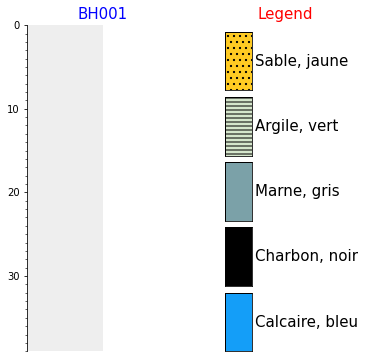

In [26]:
p.boreholes_3d[0].plot2d()

In [27]:
pause

NameError: name 'pause' is not defined

In [ ]:
p.boreholes_3d[0].plot3d()

In [ ]:
p.boreholes_3d[0].plot3d(x3d=True)

### Display project boreholes

In [ ]:
p.plot3d(labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

### Boreholes in 3D using X3D for interaction within the notebook